In [ ]:
"""
Name:Sandeep Padhi
Date:28/03/2021
"""

#The Al generated Abstract art images using GNN.
#The images at the bottom are generated by the algorithm

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
from numpy import array
import cv2
import os
from IPython.display import Image,display
from os import listdir
from os.path import isfile, join
from  PIL  import Image as ImageDisplay


#from google.colab import files
#files.upload()

onlyfiles = [f for f in listdir(os.getcwd()) if isfile(join(os.getcwd(), f))]


print(onlyfiles)
print(onlyfiles[0])
imgg=cv2.imread(os.getcwd()+"/design2.jpeg") #name of profile pic
imgg=np.array(imgg)

data_to_train=imgg


import math
print("shape is {}".format(np.shape(imgg)))
display(Image(os.getcwd()+"/design2.jpeg"))
display(Image(os.getcwd()+"/design3.jpeg"))



#arrm=cv2.imread(os.getcwd()+"/Profilepic.jpg")

def create_new_image(i):
  #Here 168 is shape of the image which can change..as per requirement
  #r=np.random.uniform(1,256,[168,168])
  #g=np.random.uniform(1,256,[168,168])
  #b=np.random.uniform(1,256,[168,168])

  #r=256*np.tan(r)%256
  #g=266*np.tan(g)%256
  #b=256*np.tan(b)%256



  #arr=[r,g,b]

  #import PIL
  #arr=np.array(arr) 
  #arr=np.reshape(arr,[168,168,3])
  #print(np.shape(arr))
  name="/Images/design"+str(i)+".jpeg"
  #print("name is {}".format(name))
  arr=cv2.imread(os.getcwd()+name)
  arr=np.array(arr) 
  #print("shape is here  {} for {}".format(np.shape(arr),name))
  
  arr=arr[:168,:189,:]
  #arr=arr.flatten()
  #print("shape is here  {}".format(np.shape(arr)))
  
  #if len(arr)==1:
  #  print("len is 1 for i={}".format(i))
  
  #arr=arr[0:160*160*3]
  
  #print("len is {}".format(len(arr)))
  #print(i)
  arr=np.reshape(arr,[168,189,3])
  #print("shape is {}".format(np.shape(arr)))


  
  #img = PIL.Image.fromarray(arr)
  
                                        
  #print("writing {}".format(name))     
  #name="design"+str(i)+".jpeg"
  #cv2.imwrite(name,arr)
  #name="/"+name
  #display(Image(os.getcwd()+name))

  #print("size is {}".format(np.shape(arr)))
  
  
  return arr

  #display(img)
  #img.save("output.png")
  

for i in  range(1,21):
  imgg=create_new_image(i)
  

imgg=cv2.imread(os.getcwd()+"/design2.jpeg") #name of profile pic
imgg=np.array(imgg)

data_to_train=imgg


print("shape is {}".format(np.shape(imgg)))
display(Image(os.getcwd()+"/design16.jpeg"))
display(Image(os.getcwd()+"/design3.jpeg"))



In [ ]:
#Generator Function
sess=tf.Session()

def generator(Z,hsize=[160, 160],reuse=False):
    with tf.variable_scope("GAN/Generator",reuse=reuse):
        h1 = tf.layers.dense(Z,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        out = tf.layers.dense(h2,168*189*3)

    return out

In [ ]:
#Discriminator Function
def discriminator(X,hsize=[160, 160],reuse=False):
    with tf.variable_scope("GAN/Discriminator",reuse=reuse):
        h1 = tf.layers.dense(X,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        h3 = tf.layers.dense(h2,2)
        out = tf.layers.dense(h3,1)

    return out, h3

In [ ]:
#Declaring placeholder
X = tf.placeholder(tf.float32,[None,168*189*3])
Z = tf.placeholder(tf.float32,[None,1000])


In [ ]:
#creating graph
G_sample = generator(Z)
r_logits, r_rep = discriminator(X)
f_logits, g_rep = discriminator(G_sample,reuse=True)


In [ ]:
disc_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=r_logits,labels=tf.ones_like(r_logits)) + tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.zeros_like(f_logits)))
gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.ones_like(f_logits)))

In [ ]:
gen_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Generator")
disc_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Discriminator")

gen_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(gen_loss,var_list = gen_vars) # G Train step
disc_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(disc_loss,var_list = disc_vars) # D Train step


In [ ]:
def sample_data(n=100):
  #print("Entered sample_Data")
  xbatch=[]
  for i in range(n):
    m=i%21
    if m==0:
      m=1
    xbatch.append(create_new_image(m))
    #print("sample_data shape {}".format(np.shape(xbatch)))
  return xbatch

In [ ]:
def sample_Z(m, n):
  return 256*np.cos(np.random.uniform(-1., 1., size=[m, n]))


In [ ]:


batch_size=100

init=tf.global_variables_initializer()
sess.run(init)


loss_g=0
loss_d=0


#X_batch = sample_data(n=batch_size)

In [ ]:
def print_n_save_array(m,j):
  import numpy as np
  #from PIL import Image,display
  from IPython.display import Image,display


#arr = np.random.randint(255, size=(28*28))
  #q=cv2.imread(os.getcwd()+"/Profilepic.jpg")
  q=np.array(m)
  print(type(q))
  name="q"+str(j)+".png"
  cv2.imwrite(name,q)
  name="/"+name
  display(Image(os.getcwd()+name))

Iterations: 0Discriminator loss: 7.157574653625488 Generator loss: 227.97691345214844
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


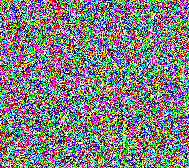

Iterations: 100Discriminator loss: 399087.8409330845 Generator loss: 68201.70481004874
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


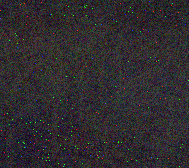

Iterations: 200Discriminator loss: 723572.507925272 Generator loss: 159396.05791350824
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


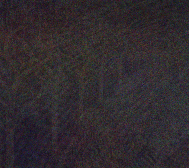

Iterations: 300Discriminator loss: 909360.039716959 Generator loss: 263001.10480996594
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


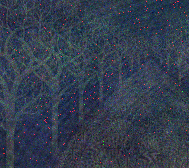

Iterations: 400Discriminator loss: 1025796.8527300358 Generator loss: 389908.3870175642
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


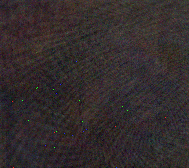

Iterations: 500Discriminator loss: 1095750.8678061962 Generator loss: 581182.0723527235
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


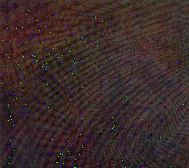

Iterations: 600Discriminator loss: 1158050.6639187143 Generator loss: 698132.8899496358
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


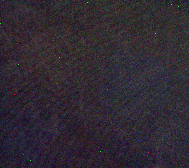

(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


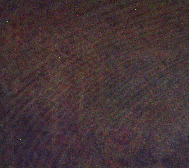

Iterations: 800Discriminator loss: 1251527.8902344527 Generator loss: 965183.7265390279
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


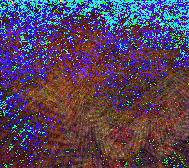

Iterations: 900Discriminator loss: 1282861.151945396 Generator loss: 1065986.8008814682
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


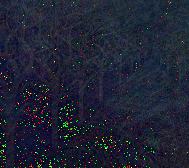

Iterations: 1000Discriminator loss: 1310824.2216871 Generator loss: 1265876.9742165562
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


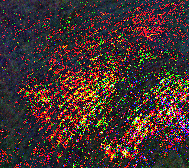

Iterations: 1100Discriminator loss: 1329412.476594744 Generator loss: 1328268.3963210408
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


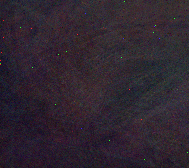

Iterations: 1200Discriminator loss: 1336739.1373723748 Generator loss: 1388278.8515044649
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


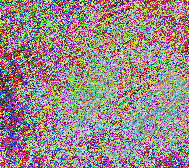

Iterations: 1300Discriminator loss: 1340925.5518624356 Generator loss: 1415382.3005562287
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


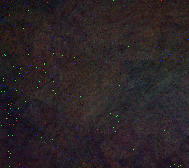

Iterations: 1400Discriminator loss: 1341743.428971069 Generator loss: 1418522.769432045
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


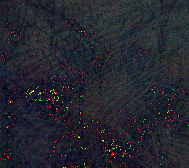

Iterations: 1500Discriminator loss: 1342103.5610320321 Generator loss: 1420382.2738678015
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


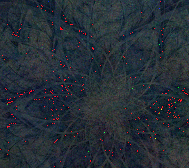

Iterations: 1600Discriminator loss: 1343054.3061164813 Generator loss: 1423190.8459357154
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


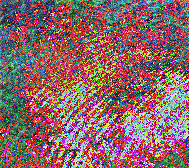

Iterations: 1700Discriminator loss: 1343440.628262441 Generator loss: 1425090.0259471145
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


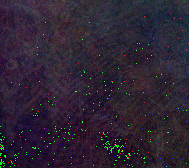

Iterations: 1800Discriminator loss: 1344030.3468940794 Generator loss: 1426641.2633431535
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


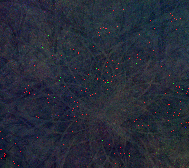

Iterations: 1900Discriminator loss: 1344403.6038254735 Generator loss: 1430040.7570912223
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


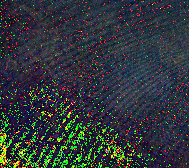

Iterations: 2000Discriminator loss: 1344778.8339211345 Generator loss: 1431761.2043022239
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


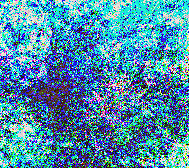

Iterations: 2100Discriminator loss: 1345349.3413048699 Generator loss: 1433419.185761583
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


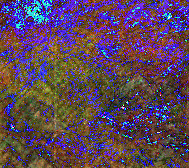

Iterations: 2200Discriminator loss: 1345666.6812756974 Generator loss: 1434112.1798754064
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


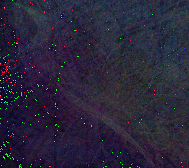

Iterations: 2300Discriminator loss: 1346153.9093700768 Generator loss: 1435208.3665684036
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


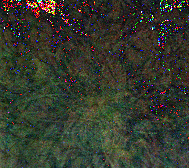

Iterations: 2400Discriminator loss: 1346566.8125200905 Generator loss: 1437777.0537061088
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


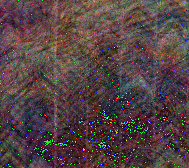

Iterations: 2500Discriminator loss: 1346953.513466079 Generator loss: 1439519.4963836733
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


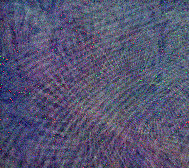

Iterations: 2600Discriminator loss: 1347818.057531866 Generator loss: 1445206.1459673084
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


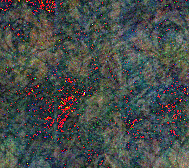

Iterations: 2700Discriminator loss: 1348184.1259439192 Generator loss: 1446731.97590269
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


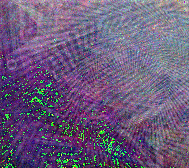

Iterations: 2800Discriminator loss: 1348579.0035561463 Generator loss: 1448146.5425820772
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


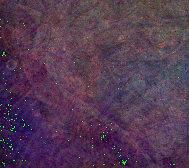

Iterations: 2900Discriminator loss: 1349219.6504218222 Generator loss: 1449853.245157786
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


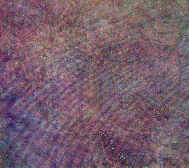

Iterations: 3000Discriminator loss: 1350143.4591879735 Generator loss: 1452536.8498804497
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


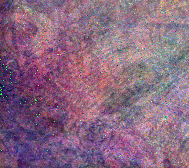

Iterations: 3100Discriminator loss: 1350420.8010853974 Generator loss: 1454030.2620018648
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


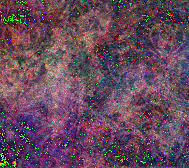

Iterations: 3200Discriminator loss: 1350849.894058715 Generator loss: 1457023.246588223
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


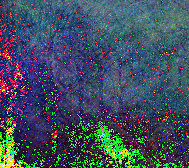

Iterations: 3300Discriminator loss: 1351371.3381855038 Generator loss: 1458681.2745850615
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


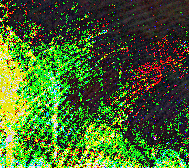

Iterations: 3400Discriminator loss: 1351850.5026268098 Generator loss: 1460485.6733297787
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


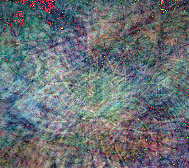

Iterations: 3500Discriminator loss: 1352417.5429444355 Generator loss: 1464817.1657727144
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


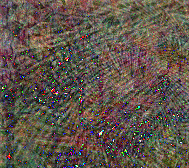

Iterations: 3600Discriminator loss: 1352842.209331807 Generator loss: 1466276.5913596104
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


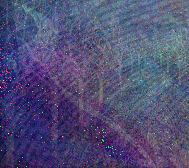

Iterations: 3700Discriminator loss: 1353133.7003578003 Generator loss: 1468126.9545560293
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


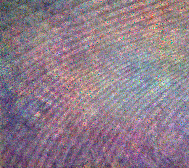

Iterations: 3800Discriminator loss: 1353577.7339051522 Generator loss: 1470559.080652414
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


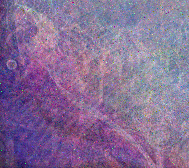

Iterations: 3900Discriminator loss: 1353866.8230972486 Generator loss: 1472089.6954167578
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


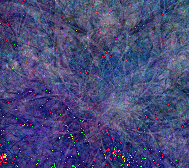

Iterations: 4000Discriminator loss: 1354106.7015947565 Generator loss: 1472780.0972535263
(168, 189, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


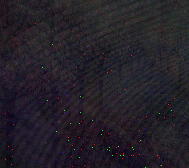

In [ ]:
#Z_batch = sample_Z(batch_size, 1000)
#print("shape of X_batch is {}".format(np.shape(X_batch)))
#print("shape of Z_batch is {}".format(np.shape(Z_batch)))
q=[]
for i in range(10000):
    X_batch = sample_data(n=batch_size)
    Z_batch = sample_Z(batch_size, 1000)
    #print("shape of X batch is {}".format(np.shape(X_batch)))
    X_batch=np.reshape(X_batch,[-1,168*189*3])

    #print("shape of X_batch is {}".format(np.shape(X_batch)))
    #print("shape of Z_batch is {}".format(np.shape(Z_batch)))
    

    
    _, dloss = sess.run([disc_step, disc_loss], feed_dict={X: X_batch, Z: Z_batch})
    _, gloss = sess.run([gen_step, gen_loss], feed_dict={Z: Z_batch})
    loss_g=loss_g+gloss
    loss_d=loss_d+dloss
    #print(i)
    if i%100==0:
      print("Iterations: {}Discriminator loss: {} Generator loss: {}".format(i,loss_d,loss_g))
      v=sess.run(generator(Z,reuse=True),feed_dict={Z:sample_Z(1,1000)})
      v=v[0]
      vactual=[]
      for i in v:
        if i>=0:
          vactual.append(i)
        else:
          vactual.append(i*-1)
          
      for i in vactual:
        if i<0:
          print("ERROFASFASDFSADFASDFSAAAAAAAAAAAAAAAAAAAA")
      v=np.reshape(v,[168,189,3])
      v=v%256
      #print("shape of v is {} at epoch {}".format(np.shape(v),i))
      #svimg=im.fromarray(data.astype('uint8'))
      v=np.array(v)
      print(np.shape(v))
      #q=v
      #imgg = ImageDisplay.fromarray(v)
      print(type(v))
      print_n_save_array(v,i)

      #cv2.imwrite("Profilepicfake.jpg",imgg)
      #display(Image(os.getcwd()+"/Profilepicfake.jpg"))


In [ ]:
from google.colab import files
files.upload()


Saving design20.jpeg to design20.jpeg
Saving design19.jpeg to design19.jpeg
Saving design18.jpeg to design18.jpeg
Saving design17.jpeg to design17.jpeg
Saving design16.jpeg to design16.jpeg
Saving design15.jpeg to design15.jpeg
Saving design14.jpeg to design14.jpeg
Saving design13.jpeg to design13.jpeg
Saving design12.jpeg to design12.jpeg
Saving design11.jpeg to design11.jpeg
Saving design10.jpeg to design10.jpeg
Saving design9.jpeg to design9.jpeg
Saving design8.jpeg to design8.jpeg
Saving design7.jpeg to design7.jpeg
Saving design6.jpeg to design6.jpeg
Saving design5.jpeg to design5.jpeg
Saving design4.jpeg to design4.jpeg
Saving design3.jpeg to design3.jpeg
Saving design2.jpeg to design2.jpeg
Saving design1.jpeg to design1.jpeg


{'design1.jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x13\x13\x12\x15\x13\x13\x13\x16\x15\x15\x17\x19\x1e\x1a\x17\x18\x17\x18\x1d\x1e!\x18 \x1d\x1f\x1d  \x1e\x1d "\x1e( \x1b\x1f&\x1b\x1b\x19!1!\')+...\x1b\x1f383-7*-.+\x01\n\n\n\x0e\r\x0e\x1b\x10\x10\x1b-% %+/-0./---/-+-5-5-/0-0-------///-------7-5--2---5--\xff\xc0\x00\x11\x08\x00\xa8\x01,\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x02\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x06\x04\x07\x00\x02\x03\x01\x08\xff\xc4\x00K\x10\x00\x02\x02\x01\x02\x05\x02\x03\x05\x03\x08\x06\x08\x06\x03\x00\x01\x02\x03\x11\x12\x04!\x00\x05\x13"1\x06A\x142Q\x07#aq\x81B\x91\xb1%35Rr\xa1\xb3\xf0\x15$b\xb2\xd1\xe1CSs\x82\x83\x92\xa2\xf14t\x93\xc1\xc2\xc3\x16Dc\xff\xc4\x00\x19\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x00\x04\x05\xff\xc4\x005\x11\x00\x01\x03\x02\x03\x05\x07\x04\x02\x01\x05\x01\x00\x00\x00\x00\x01\x00\x02\x11\